In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as md
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

In [2]:
# awk -F' ' '/^#/ || NR > 8  && NF==14 { print }' Datos_2017_5_25_5.txt > Datos_Corregidos.txt

In [2]:
def filter(datos, column, win):

	import matplotlib.pyplot as plt
	import numpy as np

	valor = 0

	step = (win-1)/2

	
	filtered_signal = np.zeros((len(datos), 1))

 
	for j in range(step,len(datos)-step):
		valor1 = 0
	
		for k in range (-step,step + 1):
			valor1 = valor1 + datos[j+k,column]
					

		filtered_signal [j-2,0] = valor1/win
		
	return filtered_signal

In [4]:
data = []

for i in range (11,24,1):

    file_name = 'data/RACIMO/Datos_2017_7_21_' + str(i) +  '.txt'
    hora = np.loadtxt(file_name, comments='#')
    data.extend(hora)
    
for i in range (24):
    file_name = 'data/RACIMO/Datos_2017_7_22_' + str(i) +  '.txt'
    hora = np.loadtxt(file_name, comments='#')
    data.extend(hora)
    
data = np.asarray(data)
len(data)

130592

In [5]:
nub_fil = filter(data, 1, 1001)
irr_fil = filter(data, 6, 1001)

In [6]:
# Date time configuration
dates = [dt.datetime.fromtimestamp(ts) for ts in data[len(data)/2:len(data),0]]
datenums = md.date2num(dates)

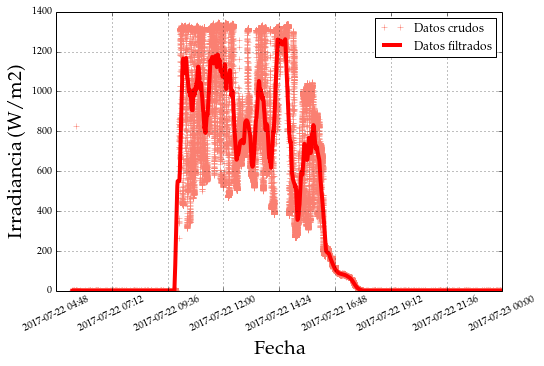

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, data [len(data)/2:len(data),6], '+', color = 'salmon')
plt.plot(datenums, irr_fil[len(data)/2:len(data)], color = 'red' , linewidth = 4)
plt.ylabel('Irradiancia (W/m2)', fontsize = 20)
plt.xlabel('Fecha', fontsize = 20)
plt.legend(['Datos crudos', 'Datos filtrados'])
ax = plt.gca()
plt.xticks( rotation=25)
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.grid()

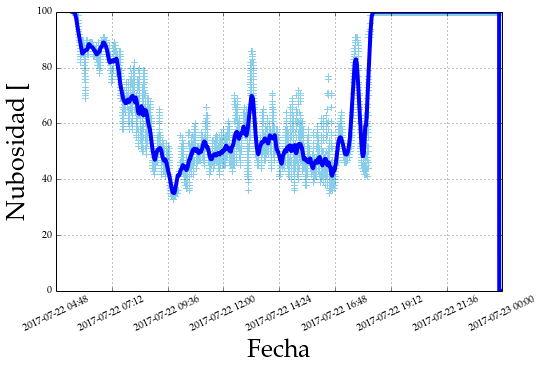

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, data [len(data)/2:len(data),1], '+' , color = 'skyblue')
plt.plot(datenums, nub_fil[len(data)/2:len(data)], color = 'blue' , linewidth = 4)
plt.ylabel('Nubosidad [%]', fontsize = 25)
plt.xlabel('Fecha', fontsize = 25)
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.grid()

In [11]:
# Date time configuration
dates = [dt.datetime.fromtimestamp(ts) for ts in data[:,0]]
datenums = md.date2num(dates)

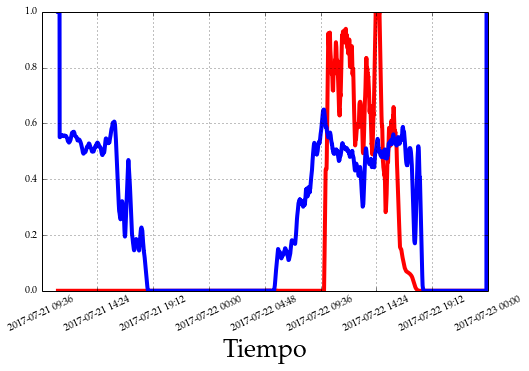

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, irr_fil/np.max(irr_fil), color = 'red' , linewidth = 4)
plt.plot(datenums, 1+ -1*nub_fil/np.max(nub_fil), color = 'blue' , linewidth = 4)
plt.xlabel('Tiempo', fontsize = 25)
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.grid()

### Computing irradiation average

In [13]:
mean_vect = []

for i in range(len(irr_fil)):

        if (irr_fil[i] > 10):   # Taking in account only over day data recorded
            
            mean_vect.append(irr_fil[i])

irr_ave = np.sum(mean_vect)/len(mean_vect)

print 'Irradiacia promedio por día = ' + str(irr_ave) + ' W/m2.day'

Irradiacia promedio por día = 723.7611132655037 W/m2.day


## SiPM behavior analysis

In order to estimate the SiPM behavior during typical weather conditions at the Cerro Machin Volcano, we extract from the Machin data the day-night variation of temperature and its correlation with DCR and breakdown voltage.

### Breakdown voltage variation

In [12]:
Temp = data [:,4]
Temp_filt = filter(data, 4, 2001)

In [13]:
N = len(Temp)
Temp_err = np.zeros(N)
err1 = np.zeros(N)
err2 = np.zeros(N)

for i in range (N):
    Temp_err[i] = Temp_filt[i] - Temp[i] 
    err1[i] = Temp_filt[i]-Temp_err[i]
    err2[i] = Temp_filt[i]+Temp_err[i]

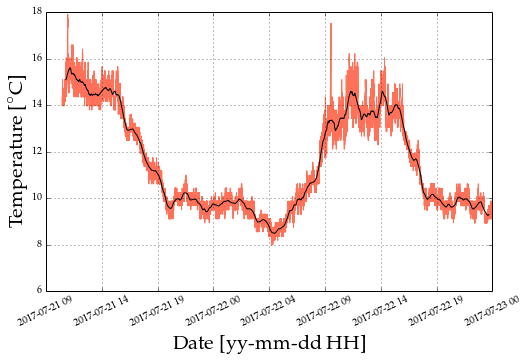

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, Temp, '-', color = 'tomato', alpha=0.9)
plt.plot(datenums[1100:N-1100], Temp_filt[1100:N-1100], 'k')
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


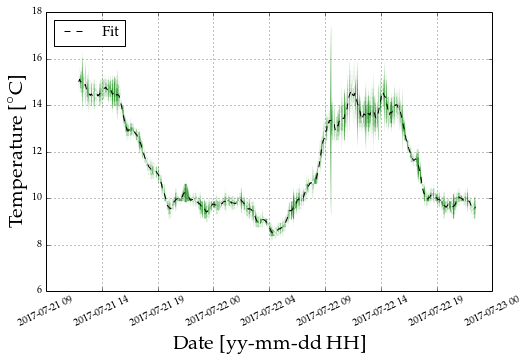

In [15]:
x = np.linspace(0,N,N)

plt.figure(figsize=(8, 5))
plt.plot(datenums[5000:N-5000], Temp_filt[5000:N-5000],  '--k')
#plt.plot(datenums, Temp_err, 'ok')
plt.fill_between(datenums[5000:N-5000], err1[5000:N-5000], err2[5000:N-5000], alpha=0.8, edgecolor='#CC4F1B', facecolor='g', linewidth=0)
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize=20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize=20)
plt.legend(["Fit","Data"], loc=2, fontsize=15)

plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

plt.show()

In [16]:
datenums = datenums[1100:N-1100]
Temp = Temp_filt[1100:N-1100]

In [17]:
Tcoeff = 41.7 # mV/C
Vb = Temp*Tcoeff

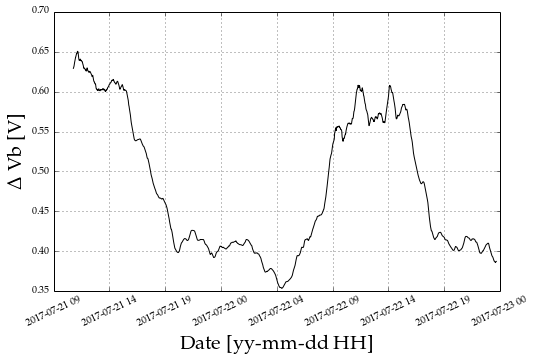

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, Vb/1000, '-', color = 'black')
plt.ylabel('$\Delta$ Vb [V]', fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

### DRC variation

In [19]:
DCRcoeff = 0.85 # kHz/C
DCR = Temp*DCRcoeff

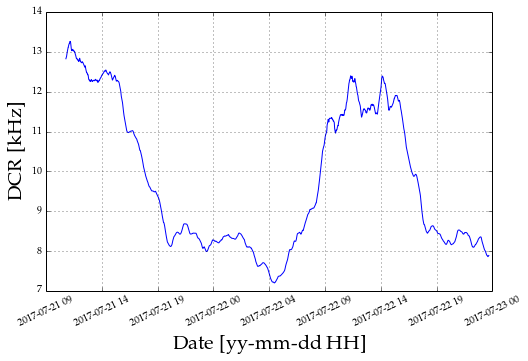

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, DCR, '-', color = 'blue')
plt.ylabel('DCR [kHz]', fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

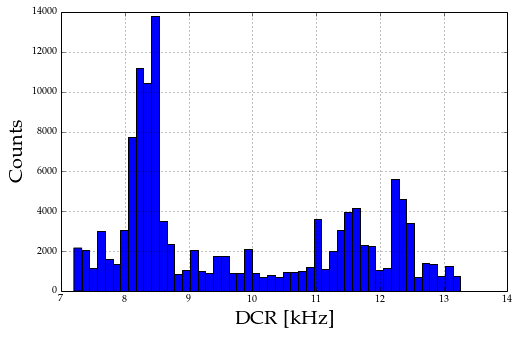

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(DCR, bins=50)
plt.ylabel('Counts', fontsize = 20)
plt.xlabel('DCR [kHz]', fontsize = 20)
plt.grid()

### Gain variation and threshold compensation

In [49]:
Gcoeff = 0.307e6 # x105/V
Gain = Vb*Gcoeff/1000

print "Min = " + str(np.min(Gain)/1e5)
print "Max = " + str(np.max(Gain)/1e5)
print "Variation = " + str((np.max(Gain) - np.min(Gain))/1e5)

Min = 1.0884180498200882
Max = 1.8616835190254828
Variation = 0.7732654692053947


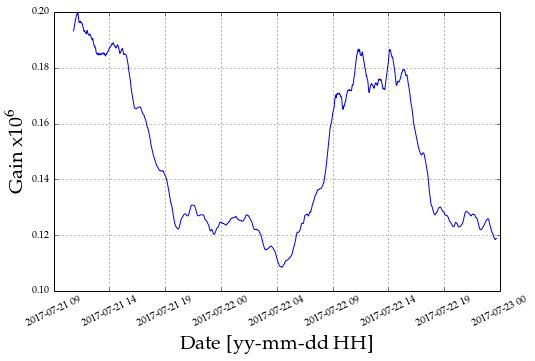

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, Gain/1e6, '-', color = 'blue')
plt.ylabel("Gain x10$^6$", fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

### Photo-electron equivalent

In [24]:
e=1.6e-19
dQ = Gain*e

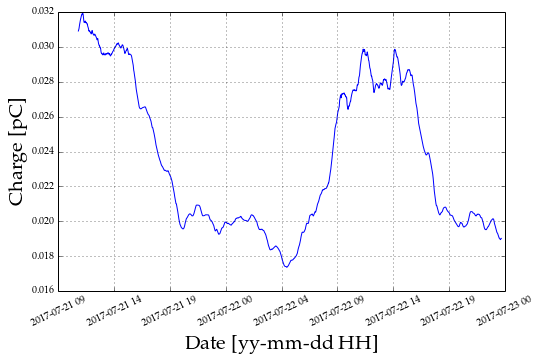

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, dQ/1e-12, '-', color = 'blue')
plt.ylabel('Charge [pC]', fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

In [26]:
peak =  (dQ*13.5e-3)/0.21e-12 # 0.21pC -> 13.5 mV

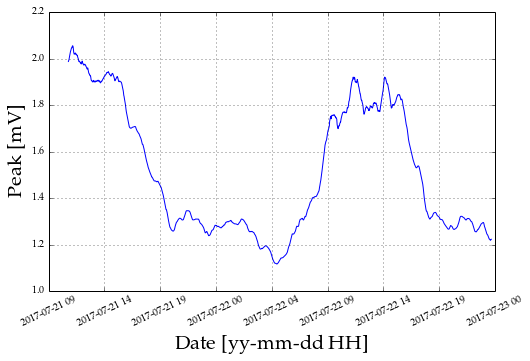

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(datenums, peak*1000, '-', color = 'blue')
plt.ylabel('Peak [mV]', fontsize = 20)
plt.xlabel('Date [yy-mm-dd HH]', fontsize = 20)
plt.grid()
ax = plt.gca()
plt.xticks( rotation=25 )
xfmt = md.DateFormatter('%Y-%m-%d %H')
ax.xaxis.set_major_formatter(xfmt)

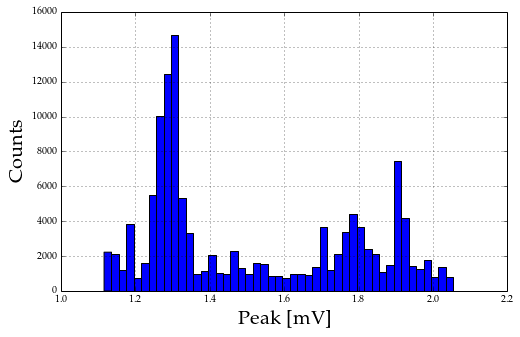

In [28]:
plt.figure(figsize=(8, 5))
plt.hist(peak*1000, bins='auto')
plt.ylabel('Counts', fontsize = 20)
plt.xlabel('Peak [mV]', fontsize = 20)
plt.grid()

### Interpanel-Variation

In [29]:
Temp_P1 = np.loadtxt('MuTe/Hodoscopio/tempTot.dat')
Temp_P2 = np.loadtxt('MuTe/Hodoscopio/tempTot2.dat')

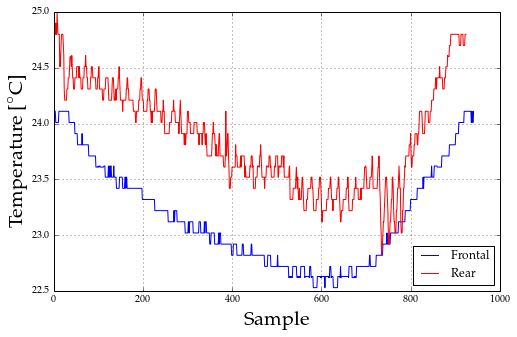

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(Temp_P1, '-', color = 'blue', label="Frontal")
plt.plot(Temp_P2, '-', color = 'red', label="Rear")
plt.ylabel(r'Temperature [$^{\circ}$C]', fontsize = 20)
plt.xlabel('Sample', fontsize = 20)
plt.legend(loc=4)
plt.grid()
plt.show()

### Spider chart analysis

https://python-graph-gallery.com/390-basic-radar-chart/

In [33]:
step = 1000
M = len(Temp_filt)
S = int(M/step)

P = len(Temp_filt[1100:M-1100])
sample = 0
Temp_pol = np.zeros(S)

for i in range(P):
    if i%step == 0:
        
        Temp_pol[sample] = Temp_filt[i]
        sample = sample + 1
        

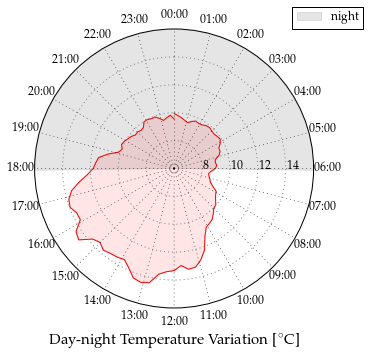

In [37]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Temp_pol[40:-1]

pi=3.1416

L = len(values)

# number of variable
categories= np.linspace(0,23,L-1, dtype ="int")
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

cat= np.linspace(0,23,24, dtype ="int")
H = ['{:02d}:{:02d}'.format(i, 0) for i in cat]

ang = [n / float(24) * 2 * pi for n in range(24)]
ang += ang[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet

    
plt.xticks(ang[:-1], H, color='k', size=12)

            
# Draw ylabels
ax.set_rgrids((0.1, 5))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Y ticks

plt.xlabel("Day-night Temperature Variation [$^{\circ}$C]", fontsize=15)

nH = 25
night = 16*np.ones(nH)
ang = np.linspace(0.55*pi, -0.55*pi,nH)

night[0] = 6
night[-1] = 6

plt.fill(ang, night, 'k', alpha=0.1)
plt.legend(["night"], loc = 1, bbox_to_anchor=(1.2, 1.1))

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid', color='r')

# Fill area
ax.fill(angles, values, 'r', alpha=0.1)

ax.plot(angles, 8*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 10*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 12*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 14*np.ones(L), linewidth=1, linestyle='dotted', color='gray')

ax.text(pi/2,8.1, "8", size=12)
ax.text(pi/2,10.1, "10", size=12)
ax.text(pi/2,12.1, "12", size=12)
ax.text(pi/2,14.1, "14", size=12)

### Break down voltage

In [38]:
Tcoeff = 41.7 # mV/C
Vb = values*Tcoeff

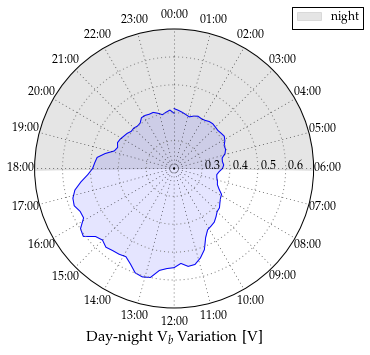

In [39]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Temp_pol[40:-1]
#values += values[:1]

L = len(values)

# number of variable
categories= np.linspace(0,23,L-1, dtype ="int")
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

cat= np.linspace(0,23,24, dtype ="int")
H = ['{:02d}:{:02d}'.format(i, 0) for i in cat]

ang = [n / float(24) * 2 * pi for n in range(24)]
ang += ang[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet

    
plt.xticks(ang[:-1], H, color='k', size=12)

            
# Draw ylabels
ax.set_rgrids((0.1, 5))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Y ticks

plt.xlabel("Day-night V$_b$ Variation [V]", fontsize=15)

nH = 25
night = 0.7*np.ones(nH)
ang = np.linspace(0.55*pi, -0.55*pi,nH)

night[0] = 0.2
night[-1] = 0.2

plt.fill(ang, night, 'k', alpha=0.1)
plt.legend(["night"], loc = 1, bbox_to_anchor=(1.2, 1.1))

# Plot data
ax.plot(angles, Vb/1000, linewidth=1, linestyle='solid', color='b')

# Fill area
ax.fill(angles, Vb/1000, 'b', alpha=0.1)

ax.plot(angles, 0.3*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 0.4*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 0.5*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 0.6*np.ones(L), linewidth=1, linestyle='dotted', color='gray')

ax.text(pi/2,0.31, "0.3", size=12)
ax.text(pi/2,0.41, "0.4", size=12)
ax.text(pi/2,0.51, "0.5", size=12)
ax.text(pi/2,0.61, "0.6", size=12)

### Dark count analysis

In [40]:
DCRcoeff = 0.85 # kHz/C
DCR = values*DCRcoeff

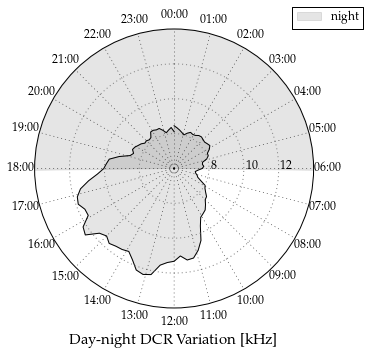

In [41]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Temp_pol[40:-1]

L = len(values)

# number of variable
categories= np.linspace(0,23,L-1, dtype ="int")
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

cat= np.linspace(0,23,24, dtype ="int")
H = ['{:02d}:{:02d}'.format(i, 0) for i in cat]

ang = [n / float(24) * 2 * pi for n in range(24)]
ang += ang[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet

    
plt.xticks(ang[:-1], H, color='k', size=12)

            
# Draw ylabels
ax.set_rgrids((0.1, 5))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Y ticks

plt.xlabel("Day-night DCR Variation [kHz]", fontsize=15)

nH = 25
night = 14*np.ones(nH)
ang = np.linspace(0.55*pi, -0.55*pi,nH)

night[0] = 6
night[-1] = 6

plt.fill(ang, night, 'k', alpha=0.1)
plt.legend(["night"], loc = 1, bbox_to_anchor=(1.2, 1.1))

# Plot data
ax.plot(angles, DCR, linewidth=1, linestyle='solid', color='k')

# Fill area
ax.fill(angles, DCR, 'k', alpha=0.1)

ax.plot(angles, 8*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 10*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 12*np.ones(L), linewidth=1, linestyle='dotted', color='gray')

ax.text(pi/2,8.1, "8", size=12)
ax.text(pi/2,10.1, "10", size=12)
ax.text(pi/2,12.1, "12", size=12)

### Peak analysis

In [59]:
Gcoeff = 0.307e6 # x105/V
Gain = Vb*Gcoeff/1000

e=1.6e-19
dQ = Gain*e

peak =  1000*(dQ*13.5e-3)/0.21e-12 # 0.21pC -> 13.5 mV

thresh = 67.5 # discrimination threshold 5 pe = 67.5 mV

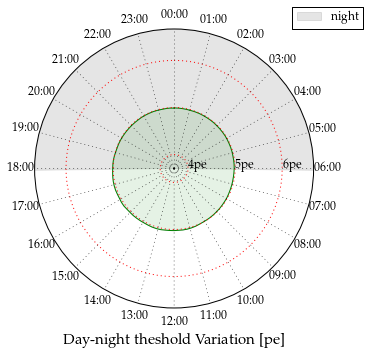

In [77]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Temp_pol[40:-1]

L = len(values)

# number of variable
categories= np.linspace(0,23,L-1, dtype ="int")
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

cat= np.linspace(0,23,24, dtype ="int")
H = ['{:02d}:{:02d}'.format(i, 0) for i in cat]

ang = [n / float(24) * 2 * pi for n in range(24)]
ang += ang[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet

    
plt.xticks(ang[:-1], H, color='k', size=12)

            
# Draw ylabels
ax.set_rgrids((0.1, 5))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Y ticks

plt.xlabel("Day-night theshold Variation [pe]", fontsize=15)

nH = 25
night = 90*np.ones(nH)
ang = np.linspace(0.55*pi, -0.55*pi,nH)

night[0] = 50
night[-1] = 50

plt.fill(ang, night, 'k', alpha=0.1)
plt.legend(["night"], loc = 1, bbox_to_anchor=(1.2, 1.1))

# Plot data
ax.plot(angles, peak + thresh - np.mean(peak), linewidth=1, linestyle='solid', color='g')

# Fill area
ax.fill(angles, peak + thresh - np.mean(peak), 'g', alpha=0.1)

# pe thresholds

ax.plot(angles, 54*np.ones(L), linewidth=1, linestyle='dotted', color='red')
ax.plot(angles, 67.5*np.ones(L), linewidth=1, linestyle='dotted', color='red')
ax.plot(angles, 81*np.ones(L), linewidth=1, linestyle='dotted', color='red')


# ax.plot(angles, 8*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
# ax.plot(angles, 10*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
# ax.plot(angles, 12*np.ones(L), linewidth=1, linestyle='dotted', color='gray')

ax.text(pi/2,54.1, "4pe", size=12)
ax.text(pi/2,67.6, "5pe", size=12)
ax.text(pi/2,81.1, "6pe", size=12)

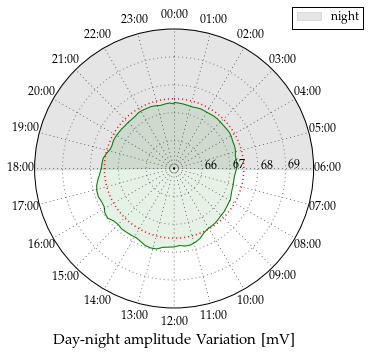

In [78]:
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = Temp_pol[40:-1]

L = len(values)

# number of variable
categories= np.linspace(0,23,L-1, dtype ="int")
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

cat= np.linspace(0,23,24, dtype ="int")
H = ['{:02d}:{:02d}'.format(i, 0) for i in cat]

ang = [n / float(24) * 2 * pi for n in range(24)]
ang += ang[:1]

# Initialise the spider plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet

    
plt.xticks(ang[:-1], H, color='k', size=12)

            
# Draw ylabels
ax.set_rgrids((0.1, 5))
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

# Y ticks

plt.xlabel("Day-night amplitude Variation [mV]", fontsize=15)

nH = 25
night = 70*np.ones(nH)
ang = np.linspace(0.55*pi, -0.55*pi,nH)

night[0] = 65
night[-1] = 65

plt.fill(ang, night, 'k', alpha=0.1)
plt.legend(["night"], loc = 1, bbox_to_anchor=(1.2, 1.1))

# Plot data
ax.plot(angles, peak + thresh - np.mean(peak), linewidth=1, linestyle='solid', color='g')

# Fill area
ax.fill(angles, peak + thresh - np.mean(peak), 'g', alpha=0.1)

# pe thresholds
ax.plot(angles, 67.5*np.ones(L), linewidth=1.5, linestyle='dotted', color='red')


ax.plot(angles, 66*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 67*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 68*np.ones(L), linewidth=1, linestyle='dotted', color='gray')
ax.plot(angles, 69*np.ones(L), linewidth=1, linestyle='dotted', color='gray')

ax.text(pi/2,66.1, "66", size=12)
ax.text(pi/2,67.1, "67", size=12)
ax.text(pi/2,68.1, "68", size=12)
ax.text(pi/2,69.1, "69", size=12)